In [1]:
from src.screenDetection import (
    SELECTED_MONITOR, AVAILABLE_MONITORS, 
    screeshot, screeshotRaw, Rect, 
    SELECTED_INTERFACE, )
import matplotlib.pyplot as plt
from PIL import ImageGrab, Image
import numpy, attrs


from holo.prettyFormats import prettyPrint, PrettyfyClass, prettyTime
from holo.profilers import SimpleProfiler, _ProfilerCategory, Profiler

In [2]:
SELECTED_MONITOR

Monitor(x=-1920, y=360, width=1920, height=1080, width_mm=477, height_mm=268, name='\\\\.\\DISPLAY2', is_primary=False)

## fullscreen screenshot

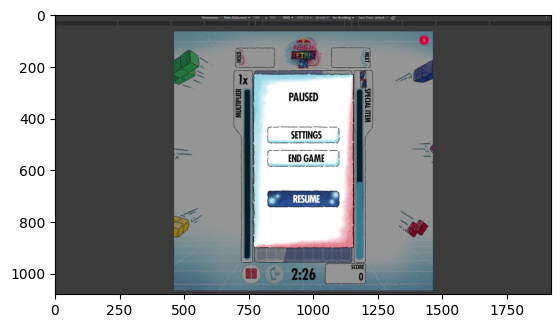

In [3]:
def cell():
    screen = screeshot(None, rgbMode=True, monitor=AVAILABLE_MONITORS[1])
    plt.imshow(screen)
cell(); del cell

In [4]:
# find the time it takes to take a full screenshot
def cell():
    pt = prettyTime
    _prof = Profiler([])
    cat = _ProfilerCategory(_prof)
    for i in range(10):
        with SimpleProfiler() as sp:
           screen = screeshot(None, rgbMode=True, monitor=AVAILABLE_MONITORS[1]) 
        cat._update(sp.time())
    print(f"-> mean: {pt(cat.avgMesure())} +- {pt(cat.stdMesure())} for fullscreen")
cell(); del cell

-> mean: 50.689 ms +- 3.286 ms for fullscreen


## partial screenshot

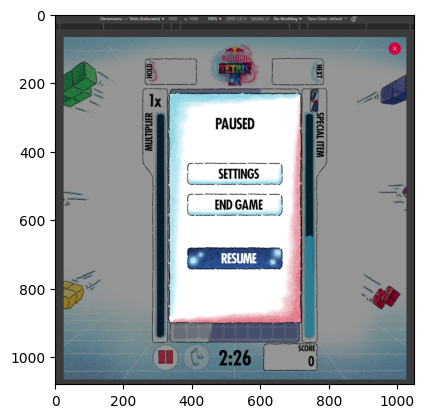

In [5]:
def cell():
    screen = screeshot(
        Rect(int(1920/2-1050/2), 0, 1050, 1080), rgbMode=True)
    plt.imshow(screen)
cell(); del cell

In [6]:
# find the time it takes to take a partial screenshot
def cell():
    pt = prettyTime
    _prof = Profiler([])
    cat = _ProfilerCategory(_prof)
    for i in range(10):
        with SimpleProfiler() as sp:
           screen = screeshot(Rect(int(1920/2-1050/2), 0, 1050, 1080), rgbMode=True)
        cat._update(sp.time())
    print(f"-> mean: {pt(cat.avgMesure())} +- {pt(cat.stdMesure())} for fullscreen")
cell(); del cell

-> mean: 51.272 ms +- 2.446 ms for fullscreen


## test interface

time to split the screen: SimpleProfiler('', 0.403 ms)


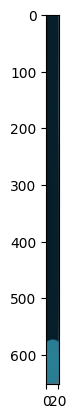

In [54]:
def cell():
    screen = screeshot(SELECTED_INTERFACE.fullInterface, rgbMode=True)
    with SimpleProfiler() as sp:
        elements = SELECTED_INTERFACE.cutScreen(screen)
    print(f"time to split the screen: {sp.perttyStr()}")
    #plt.imshow(screen)
    #plt.show()
    plt.imshow(elements.canBarre)
    plt.show()
cell(); del cell